<a href="https://colab.research.google.com/github/Ajay-B-Kumar/House-pricing-prediction-regression-kaggle/blob/main/House_pricing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the dataset

Competition Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip -o house-prices-advanced-regression-techniques.zip

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 242MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# EDA

In [6]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.shape

(1460, 81)

In [8]:
test.shape

(1459, 80)

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Preprocessing

In [11]:
train.drop(columns=['Id'])
test.drop(columns=['Id'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [12]:
missing = train.isna().sum()
missing = missing[missing>0].sort_values(ascending=False)
missing

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [13]:
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.apply(lambda row: train[train['Neighborhood'] == row['Neighborhood']]['LotFrontage'].median() if pd.isna(row['LotFrontage']) else row['LotFrontage'], axis=1)

In [14]:
# impute 0
num_zero = ["MasVnrArea", "GarageYrBlt","BsmtFullBath", "BsmtHalfBath","BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF","GarageCars", "GarageArea"]
# impute "None"
cat_none = [ "PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu","GarageType", "GarageFinish", "GarageQual", "GarageCond","BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual", "Electrical","MSZoning", "Utilities", "Functional", "Exterior1st", "Exterior2nd", "KitchenQual", "SaleType"
]

In [15]:
for col in num_zero:
  train[col] = train[col].fillna(0)
  test[col] = test[col].fillna(0)

for col in cat_none:
  train[col] = train[col].fillna("None")
  test[col] = test[col].fillna("None")


In [16]:
missing = train.isna().sum()
missing = missing[missing>0].sort_values(ascending=False)
missing

,0


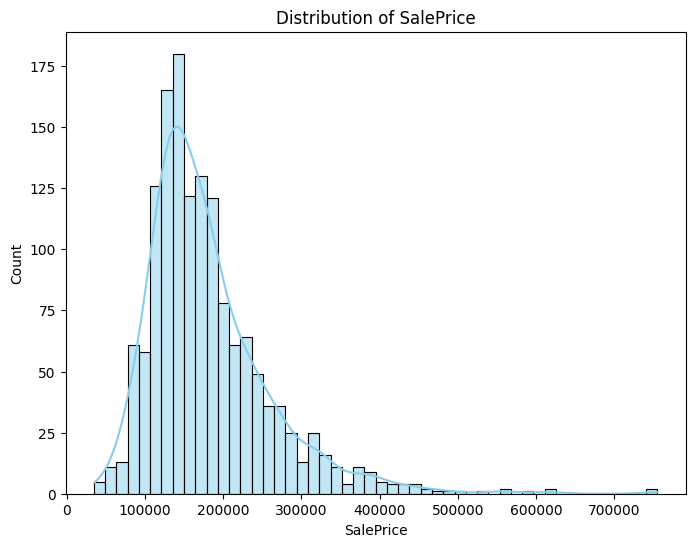

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(train["SalePrice"], kde=True, bins=50, color="skyblue")
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

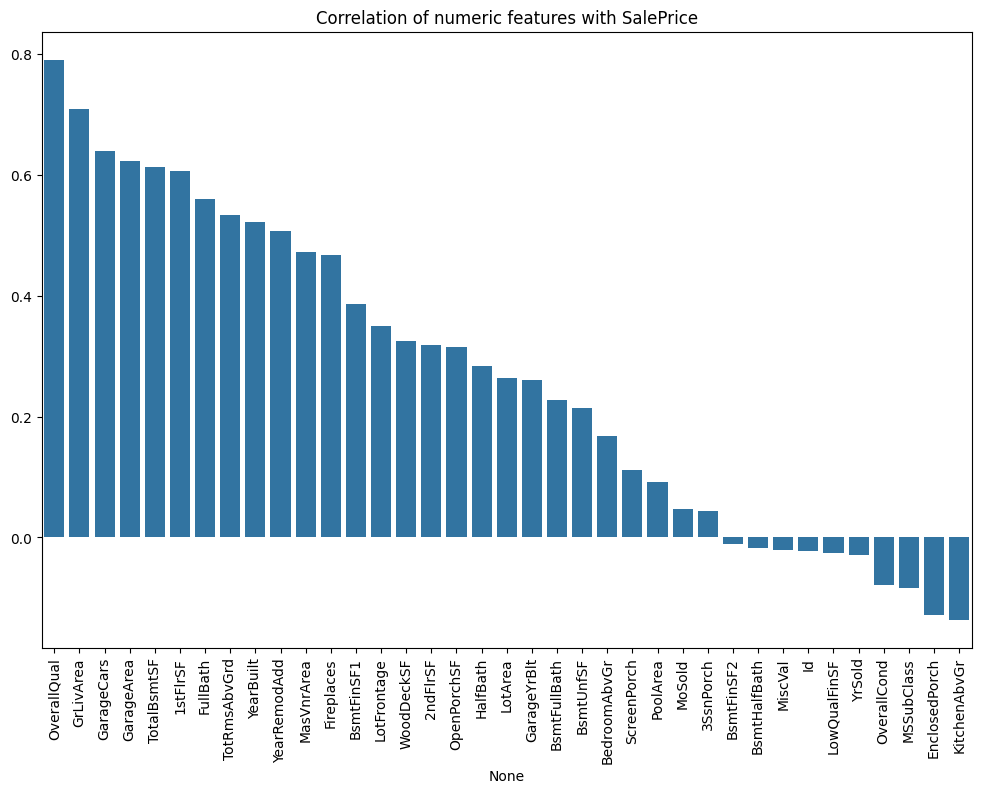

In [18]:
import numpy as np
train_num = train.select_dtypes(include=np.number)
train_num = train_num.drop(columns=["SalePrice"])
corr = train_num.corrwith(train['SalePrice']).sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=corr.index, y=corr.values)
plt.title("Correlation of numeric features with SalePrice")
plt.xticks(rotation=90)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
num_cols =  train_num.columns
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [20]:
ordinal_maps = {
    "GarageQual": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "GarageCond": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "ExterQual": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "ExterCond": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "BsmtQual": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "BsmtCond": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "HeatingQC": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "KitchenQual": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "FireplaceQu": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "BsmtFinType1": {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6},
    "BsmtFinType2": {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6},
    "BsmtExposure": {"None":0, "No":1, "Mn":2, "Av":3, "Gd":4},
    "GarageFinish": {"None":0, "Unf":1, "RFn":2, "Fin":3},
    "PoolQC": {"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
}

onehot_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
    'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive',
    'SaleType', 'SaleCondition', 'MiscFeature', 'Fence']

In [21]:
# Ordinal encoding
for col, mapping in ordinal_maps.items():
  train[col] = train[col].map(mapping)
  test[col] = test[col].map(mapping)

# One hot encoding
train = pd.get_dummies(train,columns=onehot_cols)
test = pd.get_dummies(test,columns=onehot_cols)

In [22]:
train_cols = train.columns
test = test.reindex(columns=train_cols, fill_value=0)

In [23]:
test

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,1.733238,0.437043,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.570750,3,3,...,False,True,False,False,0,False,False,True,False,False
1,1.735610,0.481637,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.027027,3,3,...,True,False,False,False,0,False,False,False,False,True
2,1.737983,0.169475,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.570750,3,3,...,False,True,False,False,0,False,False,True,False,False
3,1.740356,0.347853,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.460051,3,3,...,False,True,False,False,0,False,False,False,False,True
4,1.742728,-1.212959,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.570750,4,3,...,False,True,False,False,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.183104,-2.194041,-0.859988,-1.518467,1.280685,-0.041991,-0.720298,-0.570750,3,3,...,False,True,False,False,0,False,False,False,False,True
1455,5.185477,-2.194041,-0.864197,-1.518467,-0.517200,-0.041991,-0.720298,-0.570750,3,3,...,False,True,False,False,0,False,False,False,False,True
1456,5.187849,4.004614,0.950423,-0.795151,1.280685,-0.373198,0.539493,-0.570750,3,3,...,False,True,False,False,0,False,False,False,False,True
1457,5.190222,-0.365661,-0.007600,-0.795151,-0.517200,0.686666,0.345679,-0.570750,3,3,...,False,False,False,True,0,False,False,True,False,False


In [24]:
train.dtypes.value_counts()

,count
bool,209
float64,36
int64,15


In [25]:
train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,-1.730865,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,4,3,...,False,True,False,False,False,False,False,False,False,True
1,-1.728492,0.437043,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,3,3,...,False,True,False,False,False,False,False,False,False,True
2,-1.726120,-0.098093,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,4,3,...,False,True,False,False,False,False,False,False,False,True
3,-1.723747,-0.454850,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,3,3,...,False,True,False,False,False,False,False,False,False,True
4,-1.721374,0.615421,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,4,3,...,False,True,False,False,False,False,False,False,False,True


In [26]:
X = train.drop(columns="SalePrice",axis=1)
y = np.log(train['SalePrice'])

X_test = test.drop(columns="SalePrice",axis=1)

# Training

In [49]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)

param_grid = {
    "n_estimators": [200],
    "max_depth": [3, 7],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X, y)

print("Best parameters:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)

In [47]:
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor, callback

rmse_ls = []
for train_index, val_index in kf.split(X):
   X_train, X_val = X.iloc[train_index], X.iloc[val_index]
   y_train, y_val = y.iloc[train_index], y.iloc[val_index]
   model = XGBRegressor(**random_search.best_params_,
                        random_state=42)
   model.fit(X_train,y_train, eval_set=[(X_val, y_val)], verbose=False)
   y_pred = model.predict(X_val)
   rmse = root_mean_squared_error(y_val,y_pred)
   rmse_ls.append(rmse)

print("RMSE", rmse_ls)
print("Mean RMSE: ",np.mean(rmse_ls))

RMSE [0.10493441962077542, 0.10181082487102923, 0.12036147404941182, 0.1348484142181323, 0.1662457152121409, 0.12279147542041564, 0.08884553559023735, 0.09572458484619033, 0.13218172202251569, 0.1374538707723657, 0.1298489947913334, 0.11409264653430595, 0.1235080964548265, 0.1862264102994391, 0.14135677700798013, 0.139414962540932, 0.16489907974284934, 0.09387230175776294, 0.16872734244507884, 0.08486131670325814, 0.13695260222647346, 0.11739015558842789, 0.11451921010301655, 0.13200306622222763, 0.1133644601440687, 0.0989961756984791, 0.16451666709067092, 0.07251977023930574, 0.08538836899564511, 0.08351406722007278]
Mean RMSE:  0.12237235028097897


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    "n_estimators": [200],
    "max_depth": [3, 7],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "max_features": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    verbose=1,
    random_state=42
)

random_search.fit(X, y)
print(random_search.best_params_)
print(-random_search.best_score_)

In [46]:
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rmse_ls = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = GradientBoostingRegressor(
        **random_search.best_params_,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_ls.append(rmse)

print("RMSE", rmse_ls)
print("Mean RMSE: ", np.mean(rmse_ls))

RMSE [0.10123006954296852, 0.10394030454245588, 0.11680651402380483, 0.134978189815289, 0.15615287685949059, 0.13049711379199147, 0.09854764419623806, 0.09294813853978705, 0.12488928950563666, 0.1296056087901167, 0.13026221357707107, 0.11748907798002746, 0.1208849026521856, 0.18250589664244696, 0.14471954982853522, 0.14120486744911653, 0.14540143900439206, 0.10351043736619342, 0.1723097114070213, 0.08894279618669461, 0.14642461351230138, 0.1180548658905849, 0.11436442468362744, 0.12708082819146801, 0.12948473077140715, 0.10165525323665302, 0.16057761778537316, 0.07735504431200543, 0.07990856086267617, 0.08333856754785368]
Mean RMSE:  0.12250237161651377


In [38]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

cat = CatBoostRegressor(
    random_state=42,
    verbose=0
)

param_grid = {
    "iterations": [200],
    "depth": [3, 7],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "rsm": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    verbose=1,
    random_state=42
)

random_search.fit(X, y)
print(random_search.best_params_)
print(-random_search.best_score_)

In [45]:
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rmse_ls = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = CatBoostRegressor(
        **random_search.best_params_,
        random_state=42,
        verbose=0
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_ls.append(rmse)

print("RMSE", rmse_ls)
print("Mean RMSE: ", np.mean(rmse_ls))

RMSE [0.09981994740148681, 0.09808663009332837, 0.1255702041041991, 0.12761744484856435, 0.16519503573126704, 0.12140116028469511, 0.0820664647179628, 0.07993927729701136, 0.1296933322846595, 0.14612875577105086, 0.10887245011038713, 0.10665000324714971, 0.10495584219298135, 0.17820308316441302, 0.13192830579253448, 0.13721627026106278, 0.19593046534190015, 0.09325143236697694, 0.16926909988060787, 0.08617183014548342, 0.12866550968598658, 0.10217161948232348, 0.12148825272162801, 0.11497131951384568, 0.1035616631304071, 0.08890634637350596, 0.1538842505889944, 0.07756000472641372, 0.0749754640048073, 0.08793966076267262]
Mean RMSE:  0.11806970420094356


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

cat = CatBoostRegressor(
    random_state=42,
    verbose=0
)

param_grid = {
    "iterations": [200],
    "depth": [3, 7],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "rsm": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    verbose=1,
    random_state=42
)

random_search.fit(X, y)
print(random_search.best_params_)
print(-random_search.best_score_)

In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

svr = SVR()

param_grid = {
    "C": [0.1, 1],
    "epsilon": [0.01, 0.1],
    "kernel": ["linear","rbf"],
}

random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    verbose=1,
    random_state=42
)

random_search.fit(X, y)
print(random_search.best_params_)
print(-random_search.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'kernel': 'rbf', 'epsilon': 0.01, 'C': 1}
0.12322284590482198


In [44]:
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rmse_ls = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = SVR(
        **random_search.best_params_
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_ls.append(rmse)

print("RMSE", rmse_ls)
print("Mean RMSE: ", np.mean(rmse_ls))

RMSE [0.11609379846168108, 0.1089970043521322, 0.1516506602608921, 0.12183220872588318, 0.17600641290428803, 0.10987349594966558, 0.10058300461246204, 0.09159334855738223, 0.13294061817810437, 0.1954132412106174, 0.09606261884441804, 0.13521013372932952, 0.10222421020735391, 0.217271281319321, 0.12640616893782824, 0.12140072437984756, 0.12681604493398999, 0.10304553902565843, 0.2238711317633278, 0.072945281646043, 0.11735407614475137, 0.10987989781317235, 0.13022781762681035, 0.10616515055449365, 0.10337412120337526, 0.09900546929084483, 0.14990239573905306, 0.07992397723648402, 0.07300606944655343, 0.1030118134673009]
Mean RMSE:  0.12340292388410218


In [51]:
# Best hyperparameters after tuning
svr_best_params = {'C': 1.0, 'epsilon': 0.01, 'kernel': 'rbf'}
xgb_best_params = {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
# gbr_best_params = {'subsample': 1.0, 'n_estimators': 200, 'max_features': 1.0, 'max_depth': 3, 'learning_rate': 0.1}
# cat_best_params = {'subsample': 0.6, 'rsm': 0.8, 'learning_rate': 0.1, 'iterations': 200, 'depth': 7}

In [52]:
# XGBoost + SVR gave the best RMSE value in ensemble

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error
ensemble_rmse_scores = []
best_weights_list = []

kf = KFold(n_splits=30, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X):
    X_tr, X_val = X.iloc[train_index], X.iloc[val_index]
    y_tr, y_val = y.iloc[train_index], y.iloc[val_index]

    xgb_model = XGBRegressor(**xgb_best_params, random_state=42)
    svr = SVR(**svr_best_params)

    xgb_model.fit(X_tr, y_tr)
    svr.fit(X_tr, y_tr)

    y_pred_xgb = xgb_model.predict(X_val)
    y_pred_svr = svr.predict(X_val)

    best_rmse_fold = float("inf")
    best_weights = None

    for w in np.linspace(0, 1, 21):
        y_pred_blend = w * y_pred_xgb + (1 - w ) * y_pred_svr
        rmse = root_mean_squared_error(y_val, y_pred_blend)
        if rmse < best_rmse_fold:
            best_rmse_fold = rmse
            best_weights = (w, 1 - w)
            best_weights_list.append(best_weights)

    ensemble_rmse_scores.append(best_rmse_fold)

cv_rmse_ensemble = np.mean(ensemble_rmse_scores)
avg_weights = np.mean(best_weights_list, axis=0)
w_xgb, w_svr = avg_weights

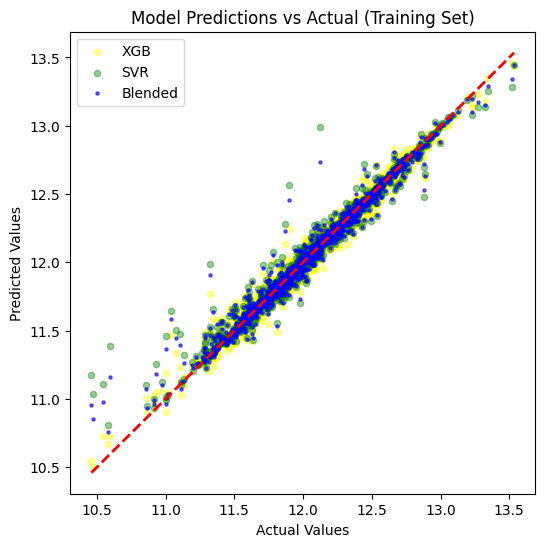

In [95]:
import matplotlib.pyplot as plt

y_pred_xgb_train = xgb_model.predict(X)
y_pred_svr_train = svr.predict(X)
y_pred_blend_train = w_xgb * y_pred_xgb_train + w_svr * y_pred_svr_train

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred_xgb_train, alpha=0.4, label='XGB',s=20, color='yellow')
plt.scatter(y, y_pred_svr_train, alpha=0.4, label='SVR',s=20, color='green')
plt.scatter(y, y_pred_blend_train, alpha=0.6, label='Blended', color='blue',s=5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Model Predictions vs Actual (Training Set)")
plt.show()


In [53]:
xgb_model = XGBRegressor(**xgb_best_params).fit(X, y)
svr = SVR(**svr_best_params).fit(X, y)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_svr = svr.predict(X_test)

y_pred_blend_test = w_xgb * y_pred_xgb + w_svr * y_pred_svr

print("CV Ensemble RMSE:", cv_rmse_ensemble)
print("Best average weights:", avg_weights)

CV Ensemble RMSE: 0.1090352221978749
Best average weights: [0.34692308 0.65307692]


In [56]:
import pandas as pd

submission = pd.DataFrame({
    'Id': np.arange(1461, 1461 + len(y_pred_blend_test)),
    'SalePrice': np.exp(y_pred_blend_test)
})

submission.to_csv('submission.csv', index=False)
submission.head(10)

,Id,SalePrice
0,1461,118267.239012
1,1462,165182.044827
2,1463,189075.175674
3,1464,193166.816769
4,1465,187178.580802
5,1466,178507.190829
6,1467,173472.366727
7,1468,160486.043732
8,1469,182170.811567
9,1470,128053.655822


In [57]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Ensemble (XGBoost + SVR)"

100% 33.7k/33.7k [00:00<00:00, 89.6kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques